# 데이터 준비

In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study')

In [132]:
import pandas as pd

train = pd.read_csv('train.csv')

print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [134]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [135]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

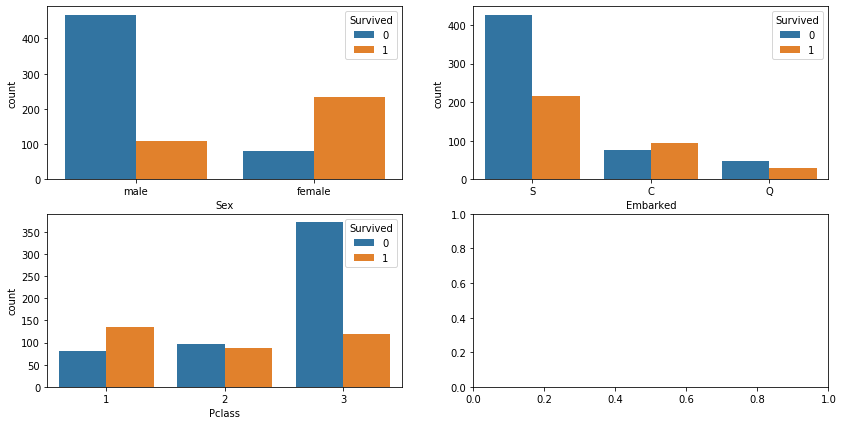

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(14,7))

sns.countplot(train['Sex'],hue=train['Survived'],ax=ax1)
sns.countplot(train['Embarked'],hue=train['Survived'],ax=ax2)
sns.countplot(train['Pclass'],hue=train['Survived'],ax=ax3)

## Survived

In [214]:
# 생존하고 죽은 사람 수
print(train['Survived'].value_counts())
survived = train['Survived']==1
no_survived= train['Survived']==0

0    549
1    342
Name: Survived, dtype: int64


In [138]:
# 생존, 사망자 비율
len(train[survived])/len(train), len(train[no_survived])/len(train)

(0.3838383838383838, 0.6161616161616161)

## 가족,형제,부모,자식
- 혈연이 있는 인원이 더 많이 죽었는지

In [140]:
print(train['SibSp'].value_counts())
print(train['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [141]:
# 혈연이 있는 사람 수
len(train.loc[(train['SibSp']!=0) | (train['Parch']!=0)])


354

In [142]:
# 생존자 중 혈연이 있는 사람의 비율
len(train.loc[((train['SibSp']!=0) | (train['Parch']!=0)) & survived ]) /len(train[survived])

0.5233918128654971

In [143]:
# 혈연이 없는 사람 수
print('혈연이 없는 사람 수:',len(train.loc[(train['SibSp']==0) & (train['Parch']==0)]))
print('혈연이 없는 사람 중, 생존률:',len(train.loc[(train['SibSp'] ==0 ) & survived & (train['Parch'] ==0)])/len(train.loc[(train['SibSp']==0) & (train['Parch']==0)]))

혈연이 없는 사람 수: 537
혈연이 없는 사람 중, 생존률: 0.30353817504655495


In [144]:
# 죽은 사람 중에서 혈연이 없는 사람의 비율
len(train.loc[(train['SibSp']==0) & (train['Parch']==0) & no_survived])/len(train[no_survived])

0.6812386156648452

In [145]:
# 혈연이 없는데 , 생존한 사람 수
print('혈연이 없는데 , 생존한 사람 수:',len(train.loc[(train['SibSp'] ==0 ) & survived & (train['Parch'] ==0)]))
print('총 생존자 중 차지하는 비율:' ,len(train.loc[(train['SibSp'] ==0 ) & survived & (train['Parch'] ==0)])/len(train[survived]))

혈연이 없는데 , 생존한 사람 수: 163
총 생존자 중 차지하는 비율: 0.4766081871345029


In [0]:
#혈연 데이터 추가 
train['no_kindred'] = (train['SibSp'] ==0 ) &(train['Parch'] ==0)
train['no_kindred'] = train['no_kindred'].astype(int)

test['no_kindred'] = (test['SibSp'] ==0 ) &(test['Parch'] ==0)
test['no_kindred'] = test['no_kindred'].astype(int)



In [147]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [148]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


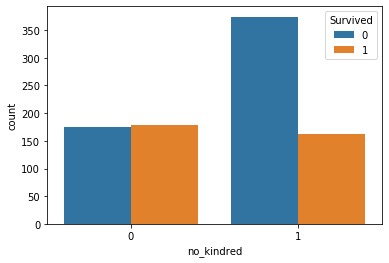

In [149]:
# 0: 혈연이 있는 인원 1: 혈연이 없는 인원
sns.countplot(data=train,x='no_kindred',hue='Survived')

eda 결과 
- 혈연이 없는데 죽은 사람의 숫자가 더 많다.
- 오히려 생존자 중에 혈연이 있는 사람의 비율이 더 높다.

컬럼 추가
- no_kindred 


## 비용



비용을 많이 낸 사람은 살았는지


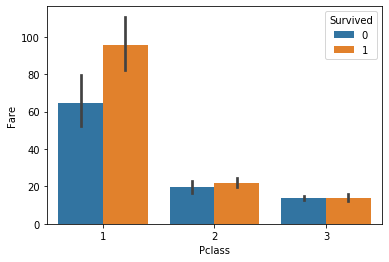

In [153]:
sns.barplot(data =train,x='Pclass',y='Fare',hue='Survived')

- 1등석이 평균적으로 많이 냈다. 1등석 중에서도 생존자가 비용을 더 많이 냈다.
- 2등석도 생존자가 비용을 조금 더 냈다.
- 3등석은 큰 차이가 없는 듯

In [154]:
a= train[(train['Pclass']==1) & (train['Survived']==1) ]
print(a['Fare'].max())
print(a['Fare'].min())
# 1등석 생존자의 요금 편차가 심함

512.3292
25.9292


In [218]:
# 1등석 생존자의 비용의 중앙치 값
train.loc[fst & survived,['Fare']].median()

Fare    77.9583
dtype: float64

In [219]:
# 1등석 사망자의 비용 중앙치 값
train.loc[fst & no_survived,['Fare']].median()

Fare    44.75
dtype: float64

In [223]:
# 2등석 생존자 비용 평균
train.loc[snd & survived,['Fare']].mean()

Fare    22.0557
dtype: float64

In [221]:
# 2등석 사망자 비용 평균
train.loc[snd & no_survived,['Fare']].mean()

Fare    19.412328
dtype: float64

In [155]:
# 요금의  평균: 32
train['Fare'].mean()

32.2042079685746

In [241]:
# 요금을  이상 낸 인원의 사망자와 생존자수
a= train[(train['Fare']<=50) & (train['Age'] >10) ]
a['Survived'].value_counts() # 473,197

0    498
1    233
Name: Survived, dtype: int64

In [0]:
train['f50&a10'] = (train['Fare']<=50) & (train['Age'] >10)
train['f50&a10']= train['f50&a10'].astype(int)

test['f50&a10'] = (test['Fare']<=50) & (test['Age'] >10)
test['f50&a10']= test['f50&a10'].astype(int)

In [244]:
print(train.shape)

(891, 21)


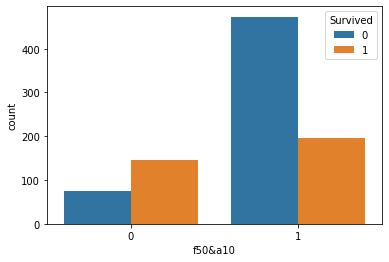

In [245]:
# 1: 요금 50이하,나이11세이상, 0: 그렇지 않은 인원
sns.countplot(data=train,x='f50&a10',hue='Survived')

나이와 비용의 관계

In [0]:
a =train[train['Fare'] <= 200]

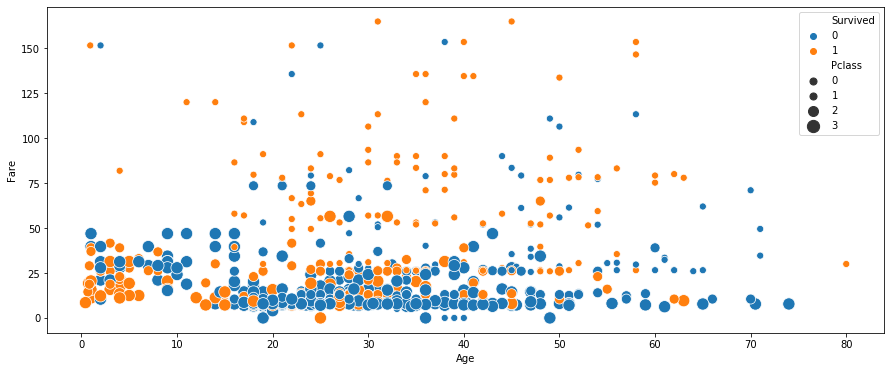

In [159]:
plt.figure(figsize=(15,6))
a= sns.scatterplot(data=a,x='Age',y='Fare',hue='Survived',size='Pclass',sizes=(50,150))

In [160]:
# 위 산점도를 보면 3등석 임에도 10세 이하는 생존자가 많아 보인다.
a= train[train['Age'] <=10]
print(a['Survived'].value_counts())


1    38
0    26
Name: Survived, dtype: int64


In [59]:
train['']

0.5666666666666667

eda 결과
- 돈 많이 낸 사람이 많이 살아남았다
- 어린 인원은 돈을 많이 안냈어도 많이 살아남았다.

컬럼 추가
- f50&a10 : 요금50이하 이면서 나이 11살 이상인 인원

## 선착장
- S 선착장에서 탄 사람이 다른 선착장에서 탄 사람보다 많이 죽었는지
- S 선착장에서 탄 사람

In [0]:
S = train['Embarked']=='S'
Q = train['Embarked'] =='Q'
C = train['Embarked']=='C'

In [163]:
len(train[S]),len(train[C]),len(train[Q])

(644, 168, 77)

In [164]:
print('S 에서 탄 인원 중 죽은사람 비율',len(train[no_survived & S])/len(train[S]))
print('C 에서 탄 인원 중 죽은사람 비율',len(train[no_survived & C])/len(train[C]))
print('Q 에서 탄 인원 중 죽은사람 비율',len(train[no_survived & Q])/len(train[Q]))

S 에서 탄 인원 중 죽은사람 비율 0.6630434782608695
C 에서 탄 인원 중 죽은사람 비율 0.44642857142857145
Q 에서 탄 인원 중 죽은사람 비율 0.6103896103896104


In [165]:
print('전체 사망자 중 S에서 탄 사람 비율:',len(train[no_survived & S])/len(train[no_survived]))
# len(train[no_survived & C])/len(train[no_survived])
# len(train[no_survived & Q])/len(train[no_survived])

전체 사망자 중 S에서 탄 사람 비율: 0.7777777777777778


eda 결과
- S 선착장에서 탄 사람이 많았고 전체 사망자 중에 S에서 탄 사람의 비율이 높은 것으로 보아 선착장 변수는 의미 있다.

## class
- 1등석이 많이 살았는지


http://rpmarchildon.com/wp-content/uploads/2018/06/titanic_class_cabin_locations.png

In [0]:
fst = train['Pclass'] ==1
snd=  train['Pclass'] ==2
thd = train['Pclass'] ==3

In [167]:
len(train[fst]),len(train[snd]),len(train[thd])

(216, 184, 491)

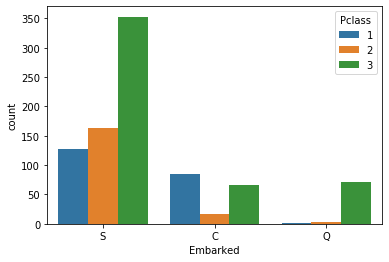

In [168]:
# 선착장별 pclass 탑승 인원
sns.countplot(data= train,x= 'Embarked',hue='Pclass')

In [0]:
train[no_survived & S & thd]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,1
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1


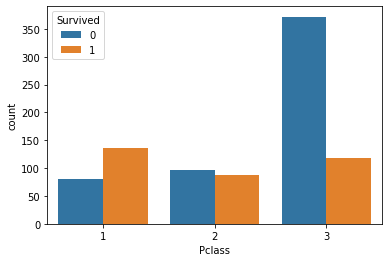

In [0]:
sns.countplot(data= train,x= 'Pclass',hue='Survived')

In [0]:
train[survived & snd]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S,1
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,0
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.0000,NaN,S,1
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.00,1,0,SC/PARIS 2149,13.8583,NaN,C,0
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,1,0,P/PP 3381,24.0000,NaN,C,0


In [0]:
print('3등석 탑승자 중 사망자 비율:',len(train[thd & no_survived])/len(train[thd]))

3등석 탑승자 중 사망자 비율: 0.7576374745417516


In [0]:
print('1등석 탑승자 중 생존자 비율:',len(train[fst & survived])/len(train[fst]))

1등석 탑승자 중 생존자 비율: 0.6296296296296297


In [0]:
print('2등석 탑승자 중 생존자 비율:',len(train[snd & survived])/len(train[snd]))

2등석 탑승자 중 생존자 비율: 0.47282608695652173


## 성별

남성이 죽은 비율

In [0]:
male = train['Sex']=='male'
female = train['Sex']=='female'

In [0]:
male_em_class= train.loc[(train['Sex']=='male') & (train['Survived']==0)]

In [171]:
len(male_em_class)

print('전체 죽은 사람 중 남성의 비율:',round(len(male_em_class)/len(train[train['Survived']==0]),2))

전체 죽은 사람 중 남성의 비율: 0.85


pclass 별 여성의 생존 수 

In [172]:
#  1등석에 탄 여성의 생존,사망자 수
a = train[fst & female]
a['Survived'].value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [173]:
# 2등석에 탄 여성의 생존,사망자 수
a= train[snd & female]
a['Survived'].value_counts()

1    70
0     6
Name: Survived, dtype: int64

In [174]:
# 3등석에 탄 여성의 생존,사망자 수
a= train[thd & female]
a['Survived'].value_counts()

1    72
0    72
Name: Survived, dtype: int64

eda 결과
- 남성은 대부분 죽었다
- 1등석에 탄 여성은 3명만 죽었고 2등석은 6명만 죽었다. 3등석은 반반


## 나이

나이가 결측치인 인원

In [103]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
no_kindred       0
Fare_cut         0
dtype: int64

In [246]:

a= train[train['Age'].isnull()]
a['Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

In [0]:
# age 결측치는 의미를 부여하는게 좋을 것 같으니 값 100으로 채움. 
train['Age']=train['Age'].fillna(100)

test['Age']=test['Age'].fillna(100)

eda 결과
- 나이가 결측치인 인원은 사망자가 높은편이다.  


# preprocessing

In [177]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0


선착장 onehot encoding

In [178]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
no_kindred       0
dtype: int64

In [181]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
no_kindred       0
dtype: int64

In [0]:
# embarked 결측치는 무난한 S로 채움
train['Embarked']=train['Embarked'].fillna('S')


In [0]:

train['embark_s']=  S
train['embark_q']= Q
train['embark_c'] = C

test['embark_s']=  S
test['embark_q']= Q
test['embark_c'] = C

In [0]:
train['embark_s']= train['embark_s'].astype(int)
train['embark_q']= train['embark_q'].astype(int)
train['embark_c']= train['embark_c'].astype(int)

test['embark_s']= test['embark_s'].astype(int)
test['embark_q']= test['embark_q'].astype(int)
test['embark_c']= test['embark_c'].astype(int)

In [188]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,embark_s,embark_q,embark_c
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0


In [189]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,embark_s,embark_q,embark_c
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,1,0,0


성별 onehot encoding

In [0]:

train['Sex']=train['Sex'].map({'male':0,'female':1})

test['Sex']=test['Sex'].map({'male':0,'female':1})

pclass onehot encoding

In [0]:

train['Pclass_1'] = fst
train['Pclass_2'] = snd
train['Pclass_3'] = thd

test['Pclass_1'] = fst
test['Pclass_2'] = snd
test['Pclass_3'] = thd

In [0]:
train['Pclass_1'] = train['Pclass_1'].astype(int)
train['Pclass_2'] = train['Pclass_2'].astype(int)
train['Pclass_3'] = train['Pclass_3'].astype(int)

test['Pclass_1'] = test['Pclass_1'].astype(int)
test['Pclass_2'] = test['Pclass_2'].astype(int)
test['Pclass_3'] = test['Pclass_3'].astype(int)

In [192]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,embark_s,embark_q,embark_c,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,0,0,1


In [193]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_kindred,embark_s,embark_q,embark_c,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,1,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,1,0,0,0,0,1


# Model

In [0]:
feature = ['Pclass_1','Pclass_2','Pclass_3','Sex','Age','Fare','embark_s','embark_q','embark_c','no_kindred','f50&a10']
x_train = train[feature]
y_train = train['Survived']

x_test = test[feature]

In [249]:
x_train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex,Age,Fare,embark_s,embark_q,embark_c,no_kindred,f50&a10
0,0,0,1,0,22.0,7.2500,1,0,0,0,1
1,1,0,0,1,38.0,71.2833,0,0,1,0,0
2,0,0,1,1,26.0,7.9250,1,0,0,1,1
3,1,0,0,1,35.0,53.1000,1,0,0,0,0
4,0,0,1,0,35.0,8.0500,1,0,0,1,1


In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1,random_state=2020)

In [251]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=2020, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [252]:
x_test.isnull().sum()

Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex           0
Age           0
Fare          1
embark_s      0
embark_q      0
embark_c      0
no_kindred    0
f50&a10       0
dtype: int64

In [253]:
 x_test['Fare']= x_test['Fare'].fillna(x_test['Fare'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
y_pred= lr.predict(x_test)

In [202]:
subm = pd.read_csv('gender_submission.csv')
subm

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [255]:
subm['Survived']= y_pred
subm

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
subm.to_csv('./submissions/logistic_reg_add_no_kind,f50a10.csv',index=False)

# 제출 후 평가

- basic logistic regression 모델은 score 0.66
- 결측치 age를 100 값을 줌. score 0.732
- kindred 컬럼을 추가한 결과 score 0.736
- f50&a10 컬럼 추가한 결과 score 0.751


